In [1]:
import pickle as pkl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [71]:
data = 'cropped(2010-2014).csv'
df = pd.read_csv(data)

print(f"dataframe '{data}' is loaded.")

scaler = MinMaxScaler()
features = ['TEMPERATURA DO PONTO DE ORVALHO(°C)','VENTO, VELOCIDADE HORARIA(m/s)', 'UMIDADE RELATIVA DO AR, HORARIA(%)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)']
target = ['RADIACAO GLOBAL(Kj/m²)']
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('train-test split complete')


dataframe 'cropped(2010-2014).csv' is loaded.
train-test split complete


In [72]:
with open('SVR_model.pkl', 'rb') as file: 
    SVR_loaded_model = pkl.load(file) 
print("model 'SVR' is loaded")

# solar_irradiation = {'Solar_Irradiation':predict,'Real':X_test_scaled,'Features':y_test}

model 'SVR' is loaded


In [73]:
print('predicting...')
predict = SVR_loaded_model.predict(X_test_scaled)
result_df = pd.DataFrame(X_test, columns=features)
result_df['Predicted_Solar_Irradiation'] = predict
result_df['Actual_Solar_Irradiation'] = y_test
    

predicting...


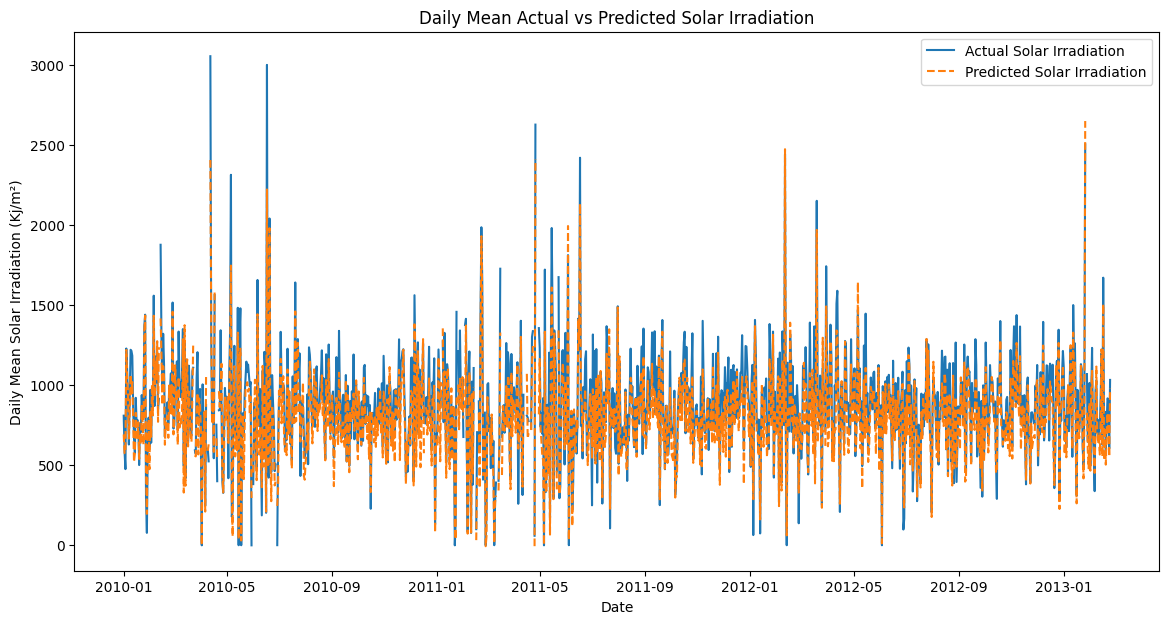

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

result_df['Date'] = pd.to_datetime(df['Data_Hora'])

# Set the 'Date' column as the index
result_df.set_index('Date', inplace=True)

# Resample to daily mean values
daily_mean_df = result_df.resample('D').mean()

# Plot the daily mean actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(daily_mean_df.index, daily_mean_df['Actual_Solar_Irradiation'], label='Actual Solar Irradiation')
plt.plot(daily_mean_df.index, daily_mean_df['Predicted_Solar_Irradiation'], label='Predicted Solar Irradiation', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Mean Solar Irradiation (Kj/m²)')
plt.title('Daily Mean Actual vs Predicted Solar Irradiation')
plt.legend()
plt.show()



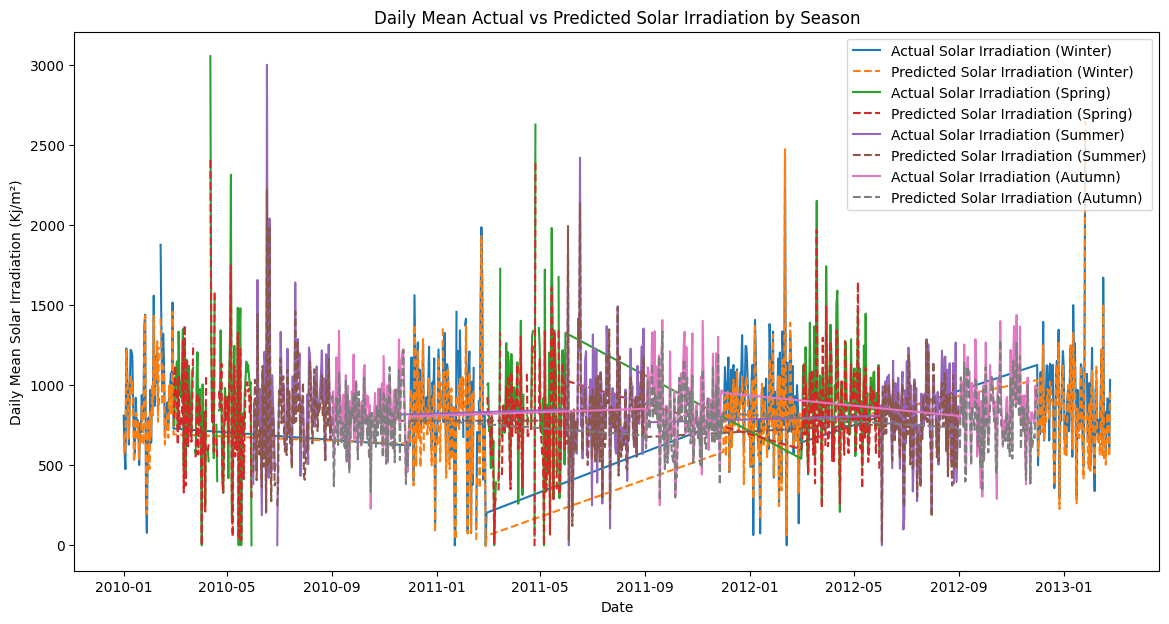

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'

# Add a season column
daily_mean_df['Season'] = daily_mean_df.index.map(get_season)

# Plot the daily mean actual vs predicted values for each season
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
plt.figure(figsize=(14, 7))

for season in seasons:
    seasonal_df = daily_mean_df[daily_mean_df['Season'] == season]
    plt.plot(seasonal_df.index, seasonal_df['Actual_Solar_Irradiation'], label=f'Actual Solar Irradiation ({season})')
    plt.plot(seasonal_df.index, seasonal_df['Predicted_Solar_Irradiation'], label=f'Predicted Solar Irradiation ({season})', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Daily Mean Solar Irradiation (Kj/m²)')
plt.title('Daily Mean Actual vs Predicted Solar Irradiation by Season')
plt.legend()
plt.show()


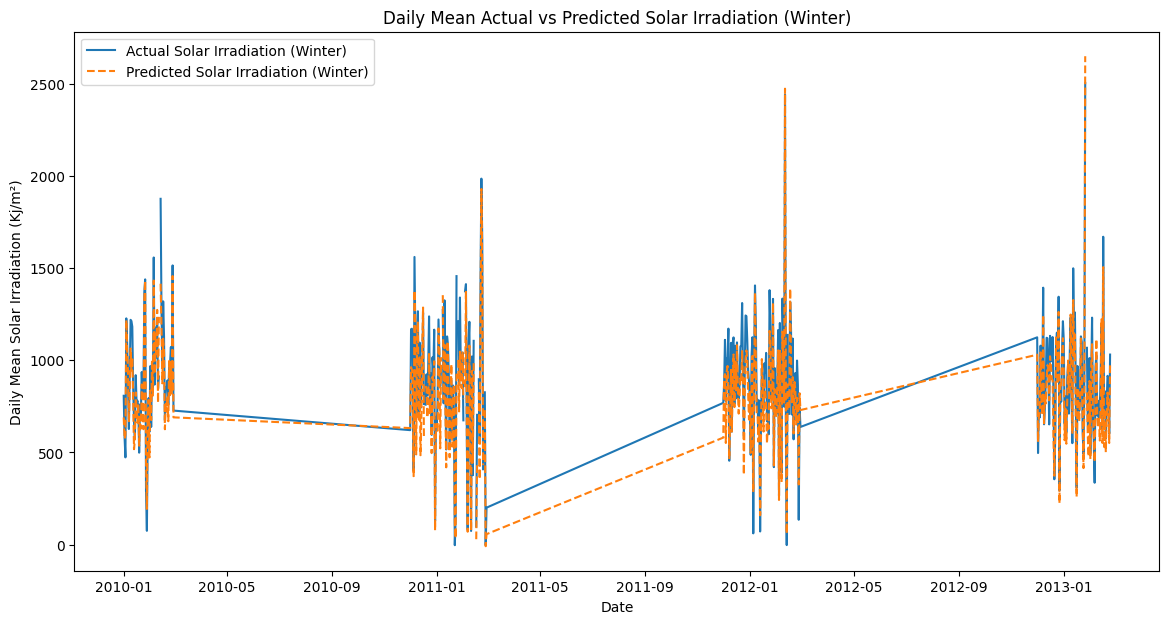

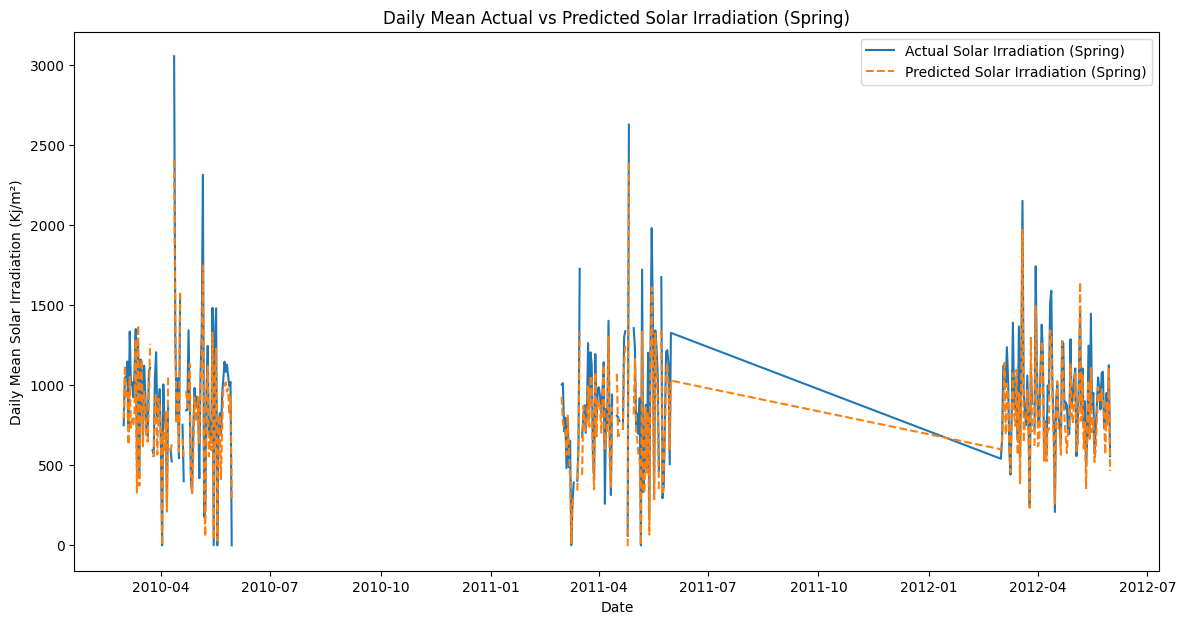

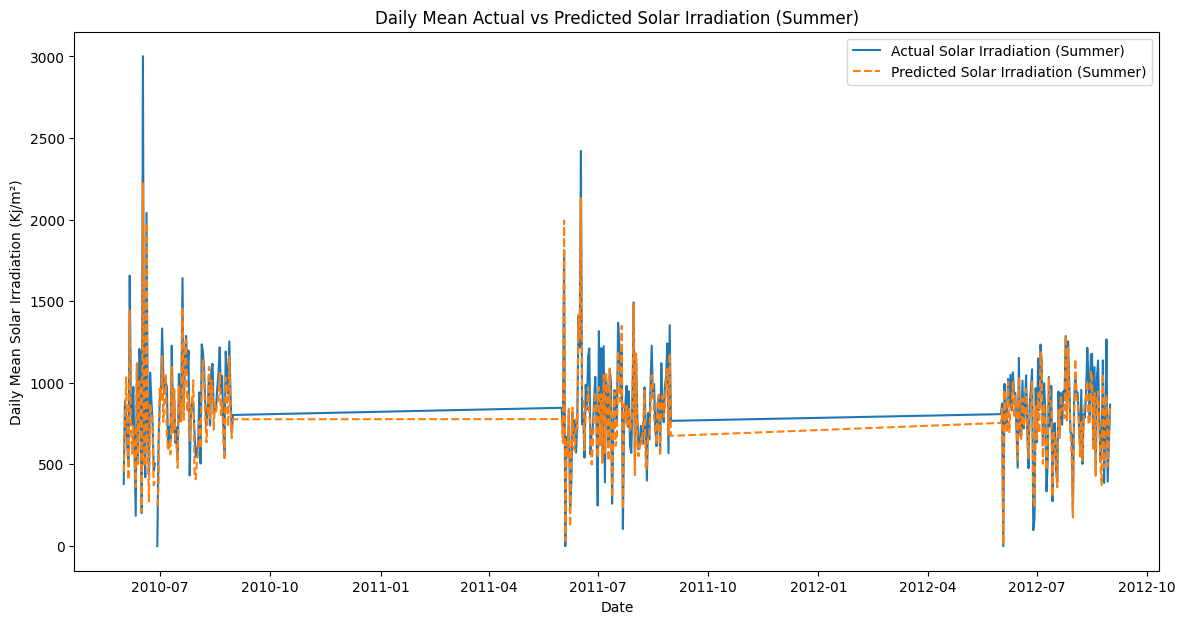

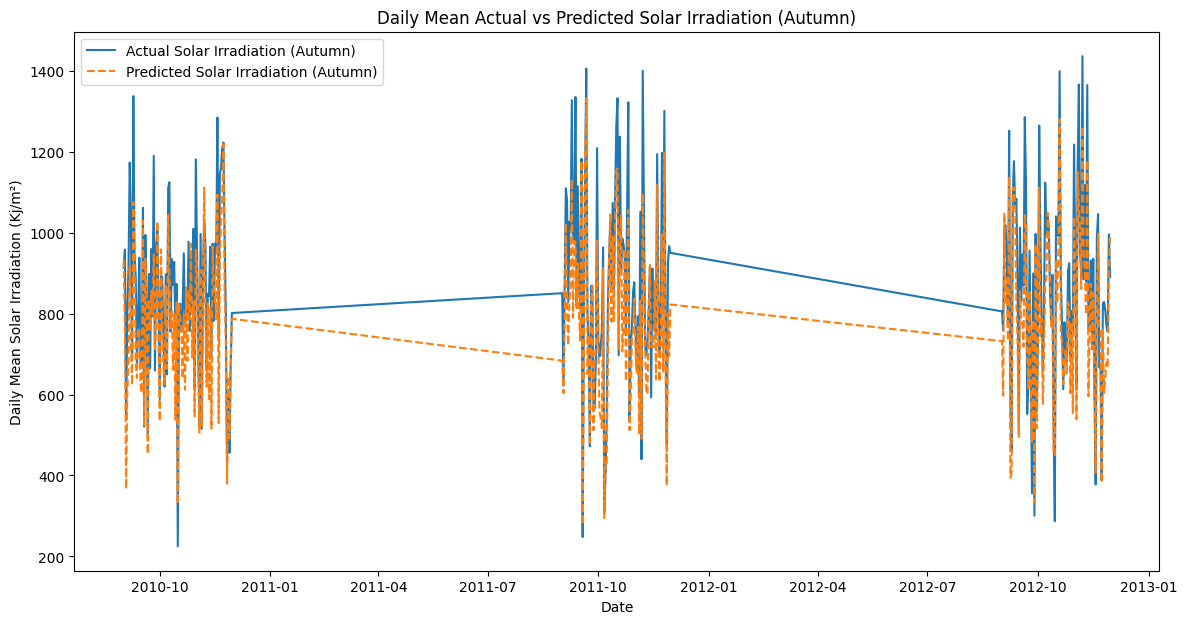

In [76]:
# Plot the daily mean actual vs predicted values for each season separately
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

for season in seasons:
    plt.figure(figsize=(14, 7))
    seasonal_df = daily_mean_df[daily_mean_df['Season'] == season]
    plt.plot(seasonal_df.index, seasonal_df['Actual_Solar_Irradiation'], label=f'Actual Solar Irradiation ({season})')
    plt.plot(seasonal_df.index, seasonal_df['Predicted_Solar_Irradiation'], label=f'Predicted Solar Irradiation ({season})', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Daily Mean Solar Irradiation (Kj/m²)')
    plt.title(f'Daily Mean Actual vs Predicted Solar Irradiation ({season})')
    plt.legend()
    plt.show()
